#**Artificial Intelligence**
#**School of Mechanical Engineering-Tehran University-2022**

#**Dear students**

#**G day**

#**We will study Recurrent Neural Networks, Gated Recurrent Unit, Long Short-Term Memory, and Generative Adversarial Networks (GANs) in this notebook. This will be our final notebook for the course. References used for this lecture are provided at the end of the notebook.**

#**Cheers,**

#**Affiliated Research Professor Mohammad Khoshnevisan**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


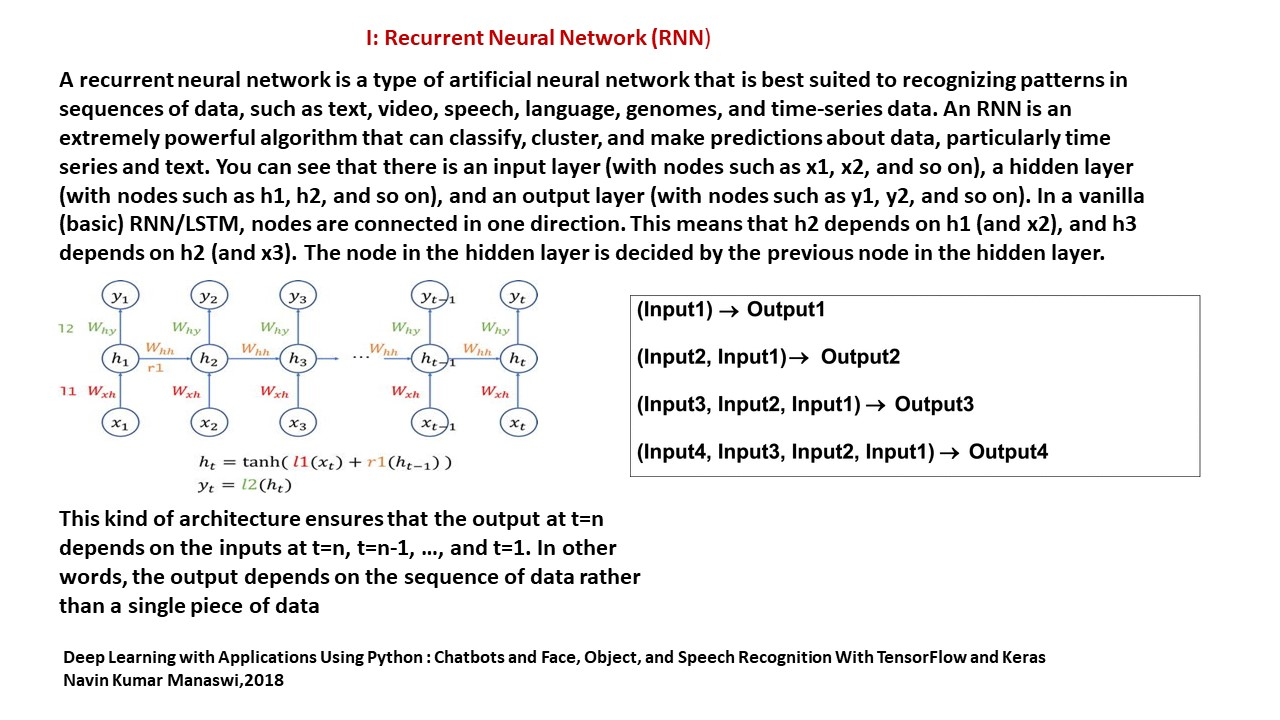

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-1.jpg', width=900,height=900)

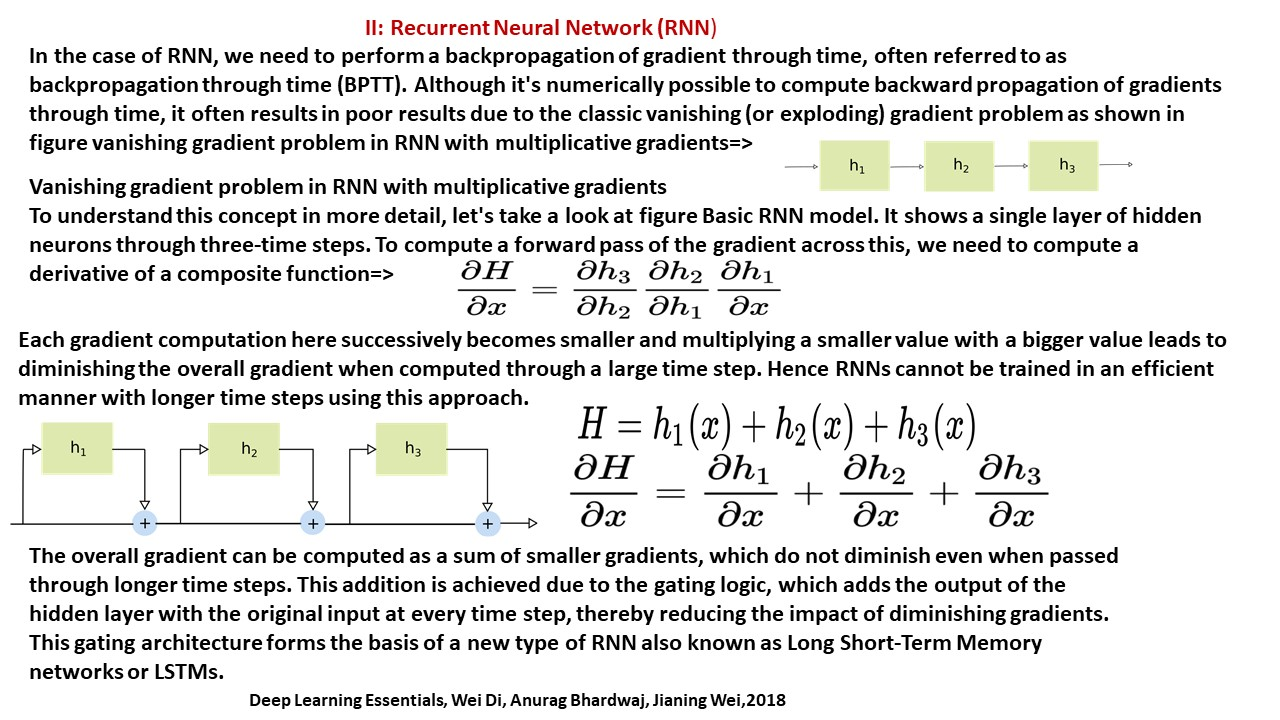

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-2.jpg', width=900,height=900)

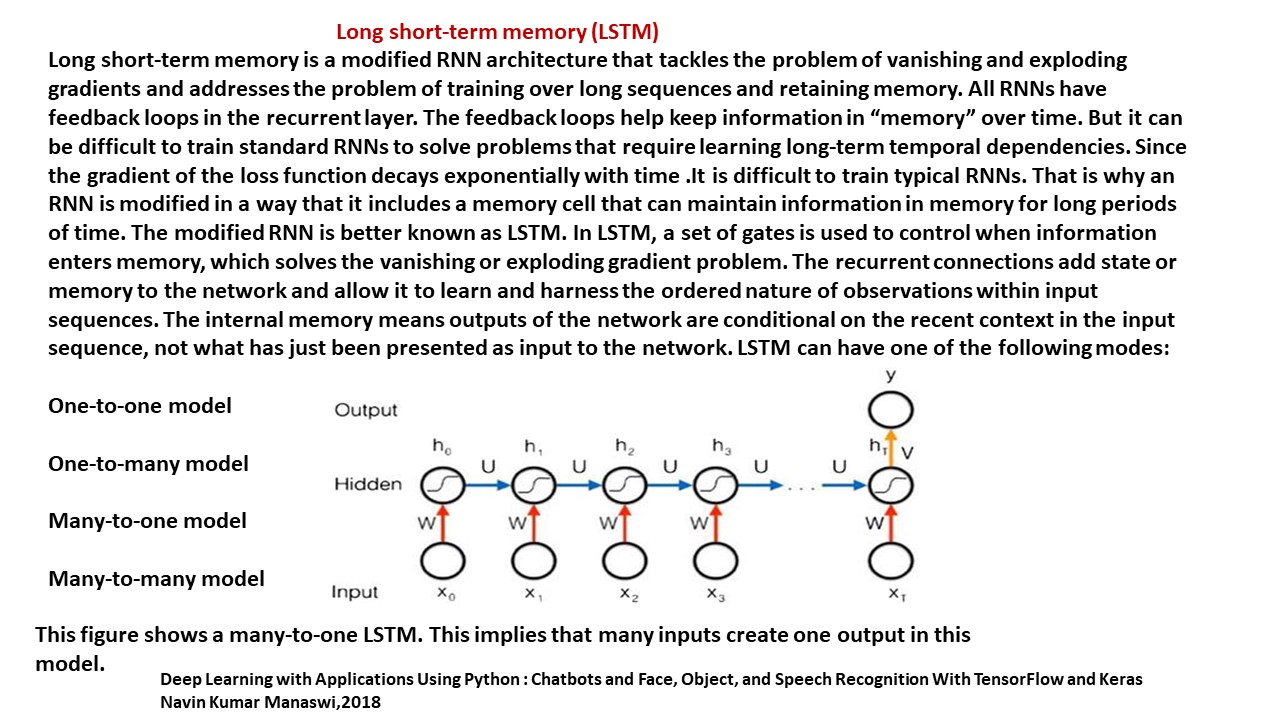

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-3.jpg', width=900,height=900)

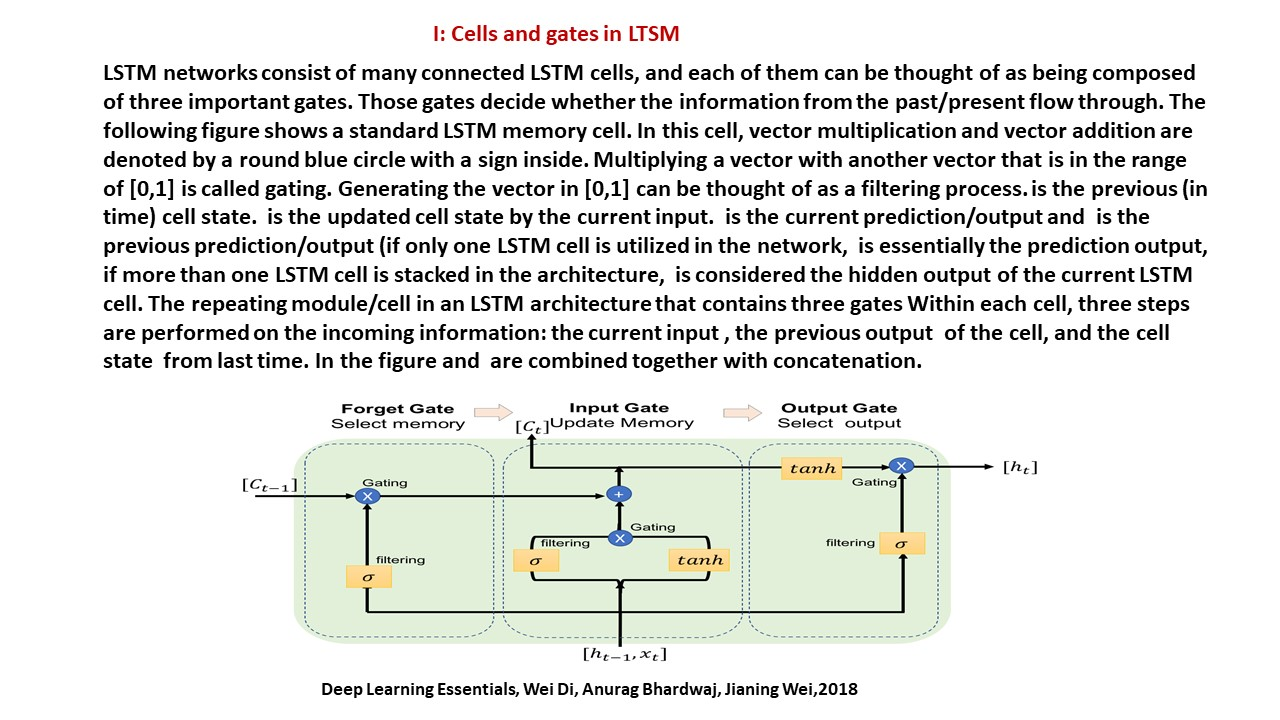

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-4.jpg', width=900,height=900)

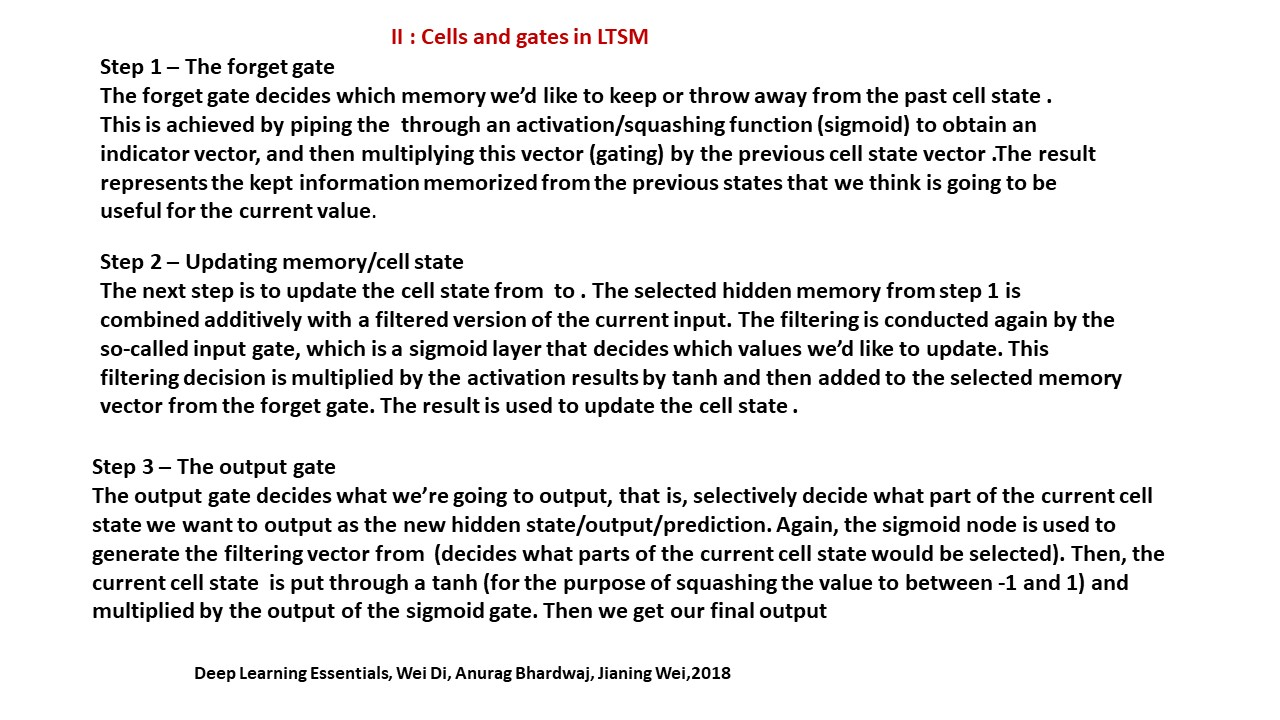

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-5.jpg', width=900,height=900)

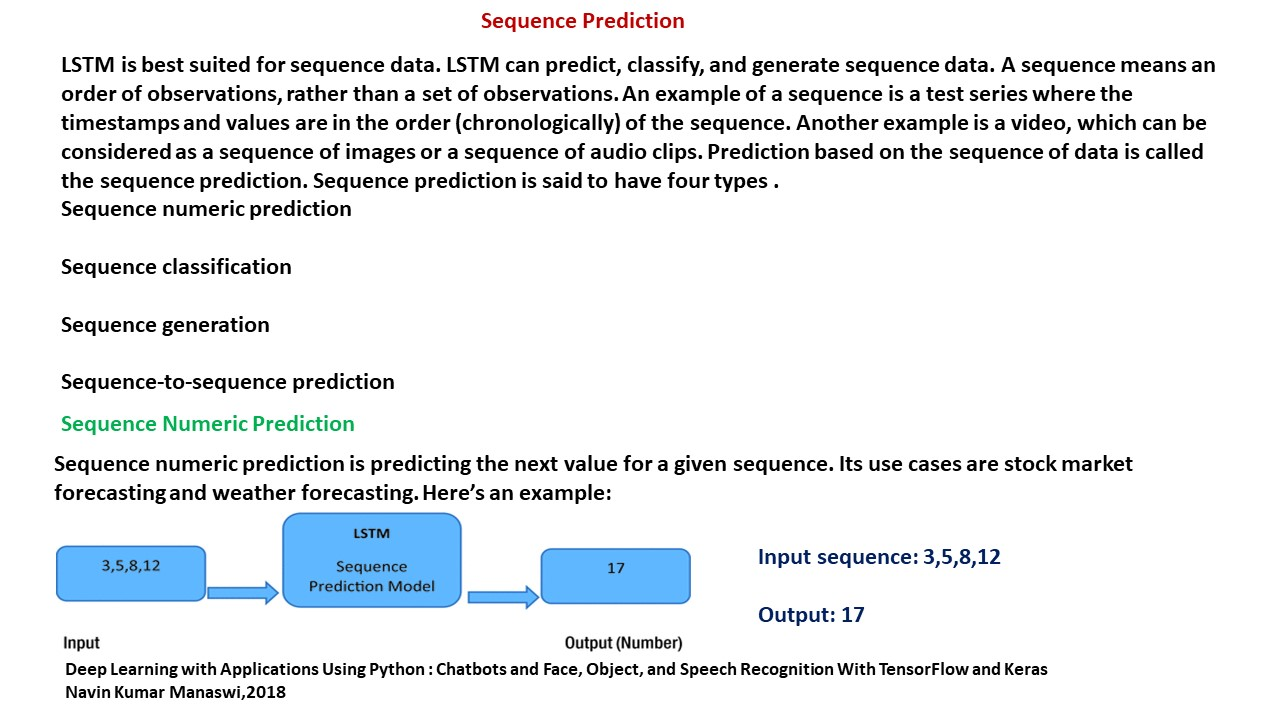

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-6.jpg', width=900,height=900)

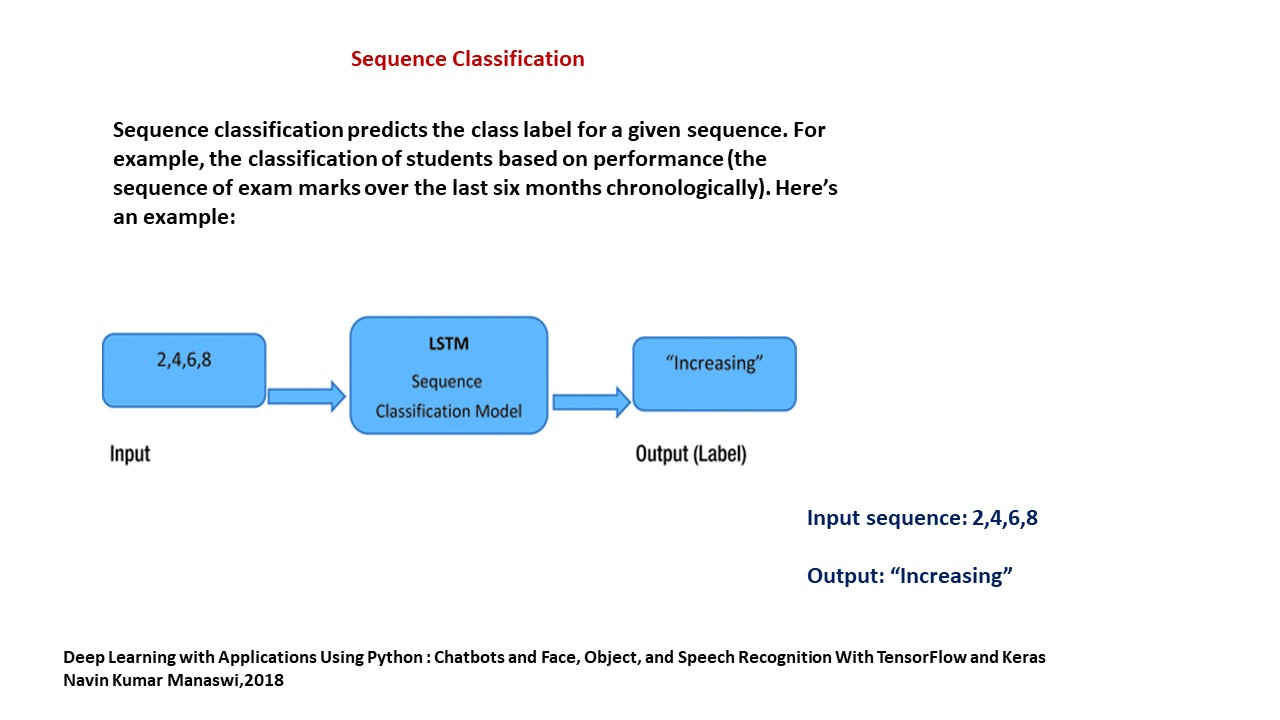

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-7.jpg', width=900,height=900)

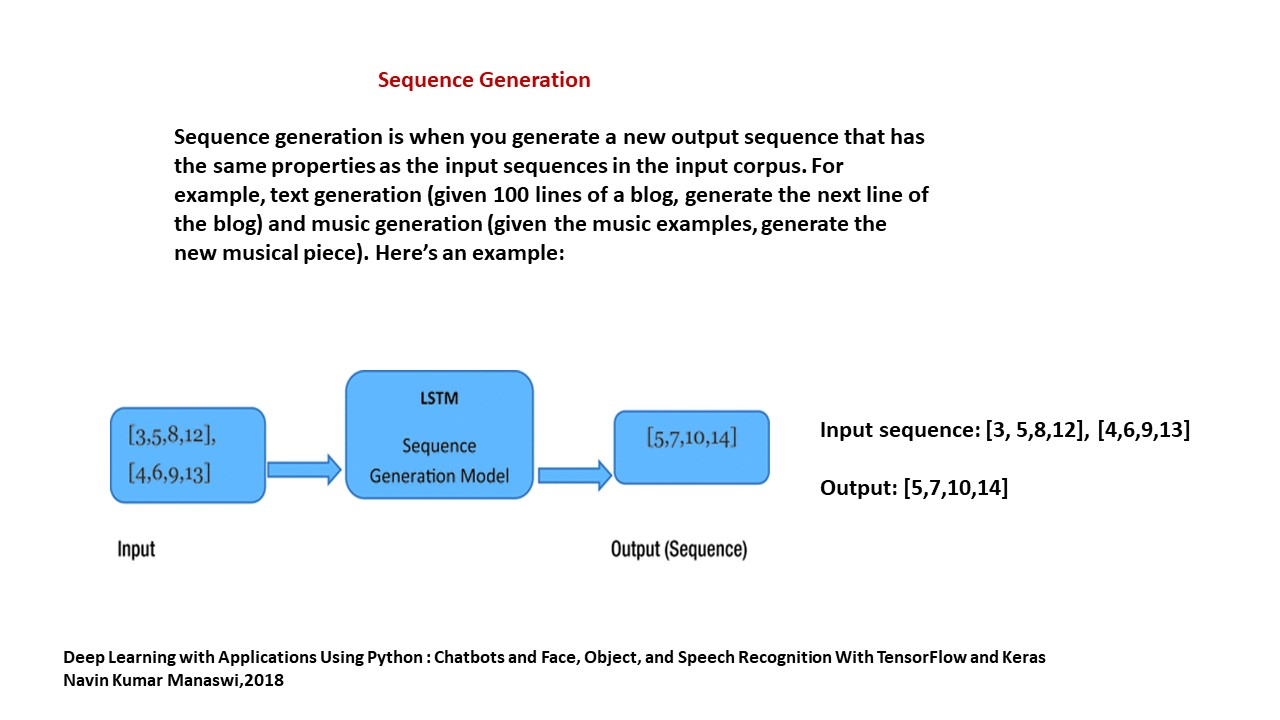

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-8.jpg', width=900,height=900)

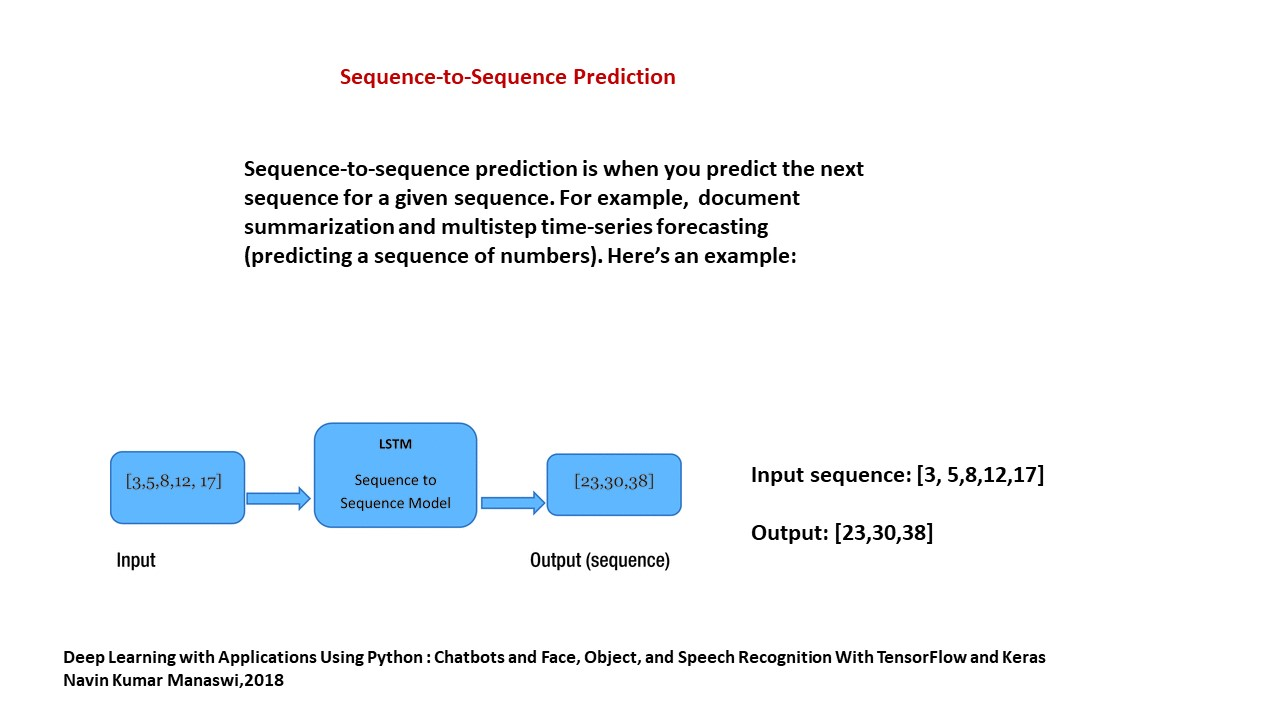

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-9.jpg', width=900,height=900)

#**Part I**
#**In this part, we will be using the example data from the Max Planck Institute for Biogeochemistry. The dataset is called the Jena Climate dataset. It contains measurements like temperature, humidity, and more, recorded every 10 minutes. You have a dataset with measures on weather data, and we try to predict the temperature 12 hours (72-time steps of 10 minutes) into the future.We will use only the temperature data and not the other variables. This may make the task slightly harder to accomplish. Note that it is possible to add other explanatory variables into an RNN. For forecasting tomorrow’s temperature, you may want to use not only today’s temperature but also today’s wind direction, wind speed, and humidity, for example. In this case, you could add a third dimension to the input data.**

#**Reference : Advanced Forecasting with Python: With State-of-the-Art-Models Including LSTMs, Facebook’s Prophet, and Amazon’s DeepAR, Joos Korstanje, 2021**

#**1.Import libraries**

In [ ]:
import keras
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


from zipfile import ZipFile
import os

with ZipFile('/content/drive/MyDrive/RNN-LSTM/jena_climate_2009_2016.zip','r') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/RNN-LSTMN')



#**2.Import our data.**

In [ ]:
csv_path = "/content/drive/MyDrive/RNN-LSTMN/jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)

#**3. The next step is to delete all columns other than the temperature, as we are building a univariate model. Keeping only the temperature data.**

In [ ]:
df = df[['T (degC)']]

#**4. We apply the min-max scaler.**

In [ ]:

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = ['T'])

# **5. We prepare our data and convert the list of lists to numpy array.We need to split the data into a shape in which we have sequences of past data and sequences of future data. We want to predict 72 steps into the future, and we’ll use 3*72 steps into the past. This is an arbitrary choice. You can try out using more or less past data.**

In [ ]:
ylist = list(df['T'])

n_future = 72
n_past = 3*72
total_period = 4*72

idx_end = len(ylist)
idx_start = idx_end - total_period

X_new = []
y_new = []
while idx_start > 0:
  x_line = ylist[idx_start:idx_start+n_past]
  y_line = ylist[idx_start+n_past:idx_start+total_period]

  X_new.append(x_line)
  y_new.append(y_line)

  idx_start = idx_start - 1



X_new = np.array(X_new)
y_new = np.array(y_new)

#**6.We do train test split.**

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.10, random_state=42)

In [ ]:
X_train.shape

(378236, 216)

#**7.It takes a long time to run this model. The batch size of 2000 is provided for demonstration purposes. But you need to put a much smaller batch size. Note that The SimpleRNN layer needs an input format that is 3D, and the shape has to correspond to (n_samples, n_timesteps, n_features). This can be obtained using reshape.**

In [ ]:
batch_size = 2000

n_samples = X_train.shape[0]
n_timesteps = X_train.shape[1]
n_steps = y_train.shape[1]
n_features = 1

X_train_rs = X_train.reshape(n_samples, n_timesteps, n_features )

X_test_rs = X_test.reshape(X_test.shape[0], n_timesteps, n_features )

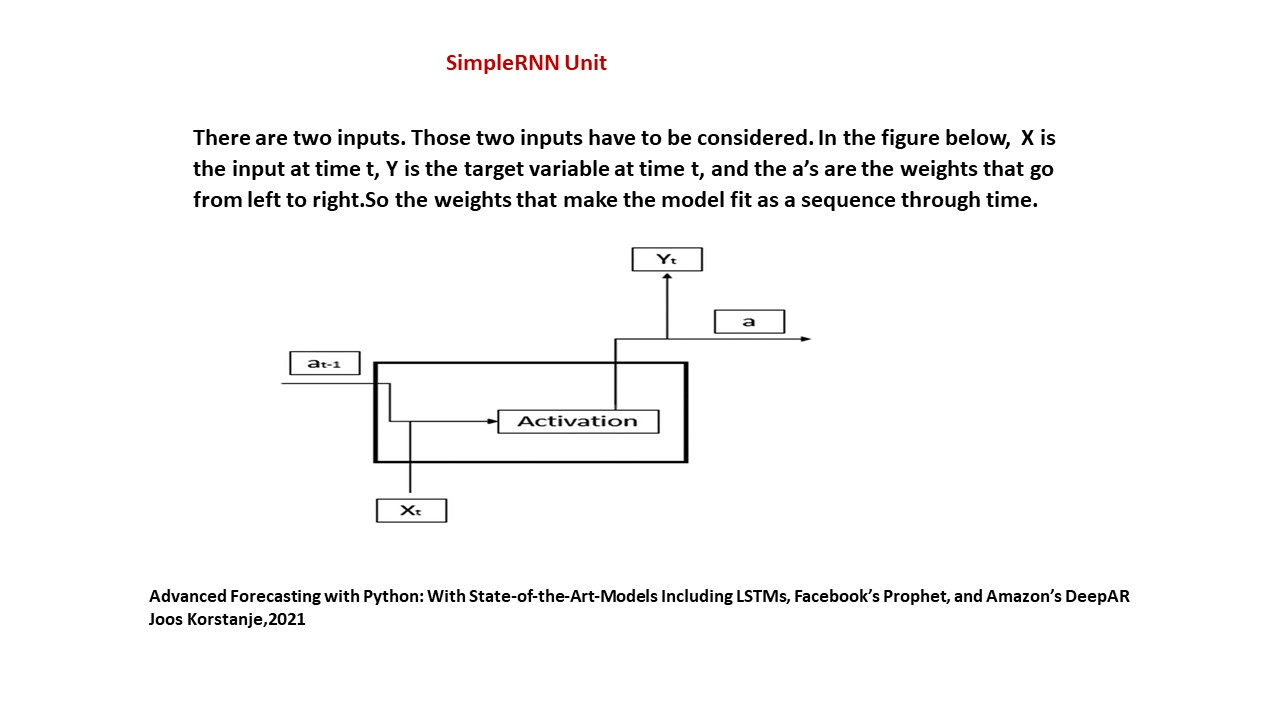

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-NB-1.jpg', width=900,height=900)

#**8.We parameterize a small network with SimpleRNN.**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 216, 8)            80        
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 216, 8)            136       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 8)                 136       
                                                                 
 dense (Dense)               (None, 72)                648       
                                                                 
Total params: 1,000
Trainable params: 1,000
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
152/152 [==============================] - 42s 262ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - val_loss: 0.0526 - val_mean_absolute_error: 0.0526
Epoch 2/5
152/152 [=

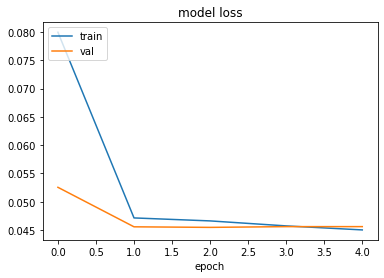

In [ ]:
random.seed(42)

simple_model = Sequential([
  SimpleRNN(8, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
  SimpleRNN(8, activation='tanh', return_sequences = True),
  SimpleRNN(8, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)



plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(r2_score(preds, y_test))

0.6863458802800287


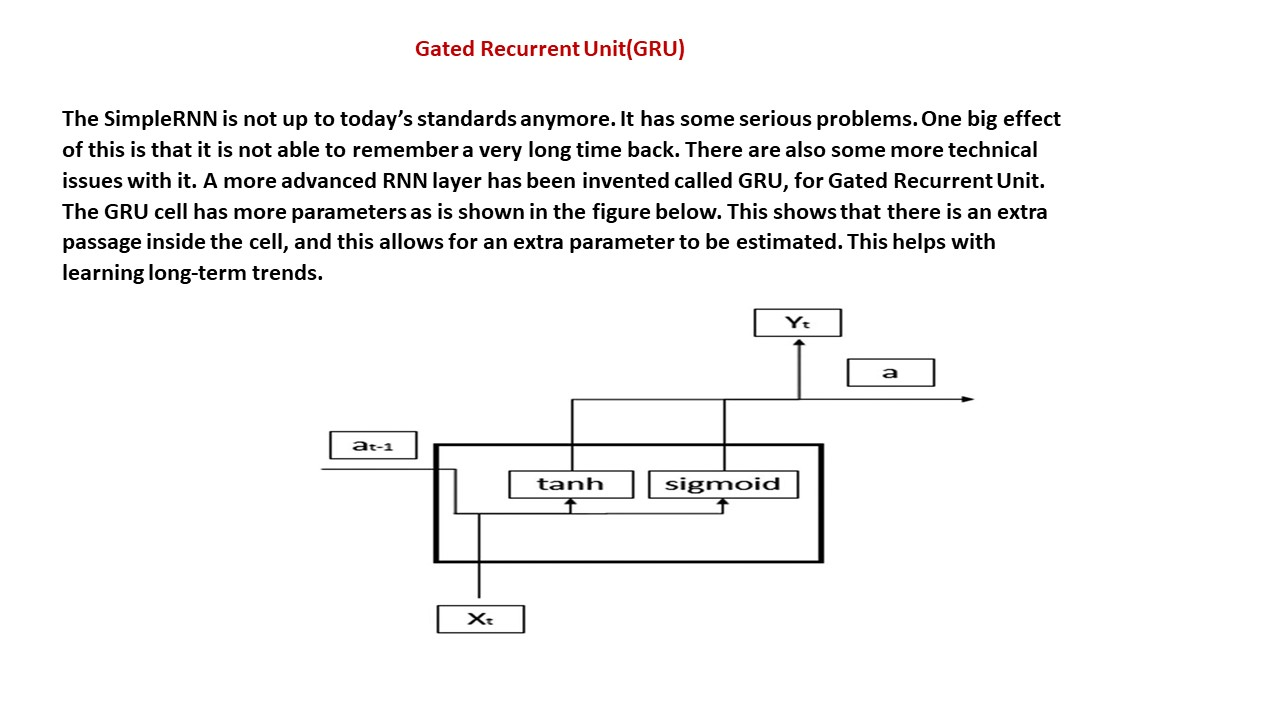

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-NB-2.jpg', width=900,height=900)

#**9.A simple architecture with 1 Gated Recurrent Unit (GRU) layer.**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 72)                648       
                                                                 
Total params: 912
Trainable params: 912
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
152/152 [==============================] - 37s 233ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - val_loss: 0.0404 - val_mean_absolute_error: 0.0404
Epoch 2/5
152/152 [==============================] - 34s 226ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - val_loss: 0.0287 - val_mean_absolute_error: 0.0287
Epoch 3/5
152/152 [==============================] - 35s 233ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - val_l

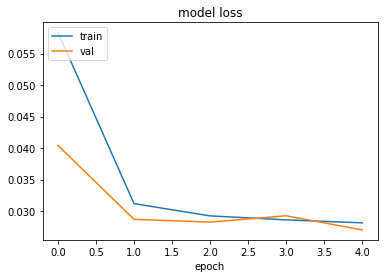

In [ ]:
random.seed(42)
from tensorflow.keras.layers import GRU

simple_model = Sequential([
   GRU(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)



plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(r2_score(preds, y_test))

0.9223744683778516


#**10.This is a  more complex network with three layers of Gated Recurrent Unit (GRU).**

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 216, 10)           390       
                                                                 
 gru_2 (GRU)                 (None, 216, 10)           660       
                                                                 
 gru_3 (GRU)                 (None, 10)                660       
                                                                 
 dense_2 (Dense)             (None, 72)                792       
                                                                 
Total params: 2,502
Trainable params: 2,502
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
152/152 [==============================] - 162s 1s/step - loss: 0.1863 - mean_absolute_error: 0.1863 - val_loss: 0.0514 - val_mean_absolute_error: 0.0514
Epoch 2/5
152/152 [=

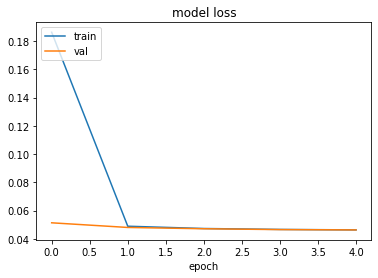

In [ ]:
random.seed(42)

simple_model = Sequential([
   GRU(10, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    GRU(10, activation='tanh', return_sequences=True),
    GRU(10, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)



plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(r2_score(preds, y_test))

0.657914827100534


#**Part II**
#**In this part, we will employ LSTM.This section uses the stock market data(SP500).** 

#**1. Import libraries.**

In [ ]:
import pandas
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# **2. We normalize the dataset and do train and test split.**

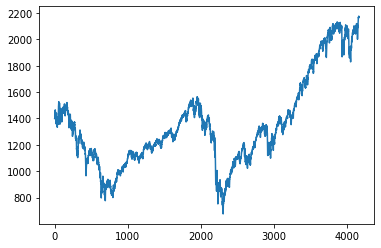

2791 1376


In [ ]:
dataset = pandas.read_csv('/content/drive/MyDrive/RNN-LSTM/sp500.csv', usecols=[0], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

In [ ]:
print(dataset)

[[0.48240909]
 [0.48420417]
 [0.48509838]
 ...
 [0.99562893]
 [0.99609603]
 [0.99436106]]


# **3. We convert an array of values into a timeseries data.**

In [ ]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX.shape

(2789, 1)

# **4. We reshape input to be [samples, time steps, features].**

In [ ]:

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# **5.We create and fit the LSTM network.**

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=10, verbose=2)

Epoch 1/100
279/279 - 2s - loss: 0.0262 - 2s/epoch - 9ms/step
Epoch 2/100
279/279 - 1s - loss: 0.0056 - 863ms/epoch - 3ms/step
Epoch 3/100
279/279 - 1s - loss: 0.0030 - 875ms/epoch - 3ms/step
Epoch 4/100
279/279 - 1s - loss: 9.0028e-04 - 900ms/epoch - 3ms/step
Epoch 5/100
279/279 - 1s - loss: 1.7473e-04 - 843ms/epoch - 3ms/step
Epoch 6/100
279/279 - 1s - loss: 1.0329e-04 - 862ms/epoch - 3ms/step
Epoch 7/100
279/279 - 1s - loss: 1.0154e-04 - 869ms/epoch - 3ms/step
Epoch 8/100
279/279 - 1s - loss: 1.0190e-04 - 883ms/epoch - 3ms/step
Epoch 9/100
279/279 - 1s - loss: 1.0157e-04 - 871ms/epoch - 3ms/step
Epoch 10/100
279/279 - 1s - loss: 1.0113e-04 - 900ms/epoch - 3ms/step
Epoch 11/100
279/279 - 1s - loss: 1.0176e-04 - 894ms/epoch - 3ms/step
Epoch 12/100
279/279 - 1s - loss: 1.0268e-04 - 872ms/epoch - 3ms/step
Epoch 13/100
279/279 - 1s - loss: 1.0203e-04 - 879ms/epoch - 3ms/step
Epoch 14/100
279/279 - 1s - loss: 1.0243e-04 - 876ms/epoch - 3ms/step
Epoch 15/100
279/279 - 1s - loss: 1.0183e-04

#**6.We rescale predicted values and compute the root mean squared error.**

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 14.94 RMSE
Test Score: 51.42 RMSE


# **7. We shift train and test predictions for plotting and plot baseline and predictions.The part in orange is the training data, the part in blue is the test data, and the part in green is the predicted output.**

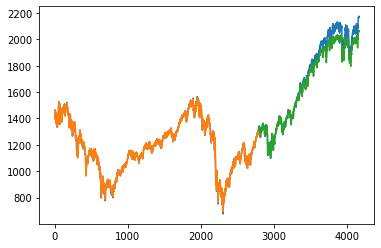

In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#**Part III**
#**Generative Adversarial Networks(GANs)**

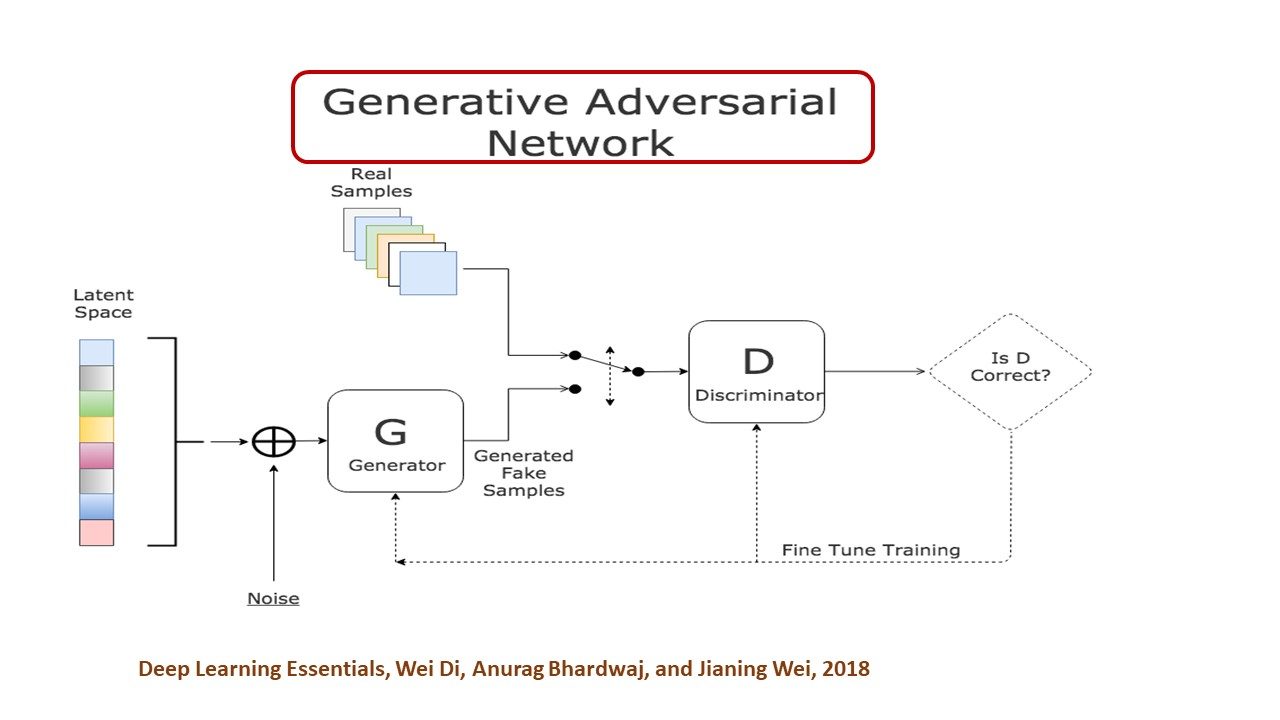

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/GAN-0.jpg', width=900,height=900)

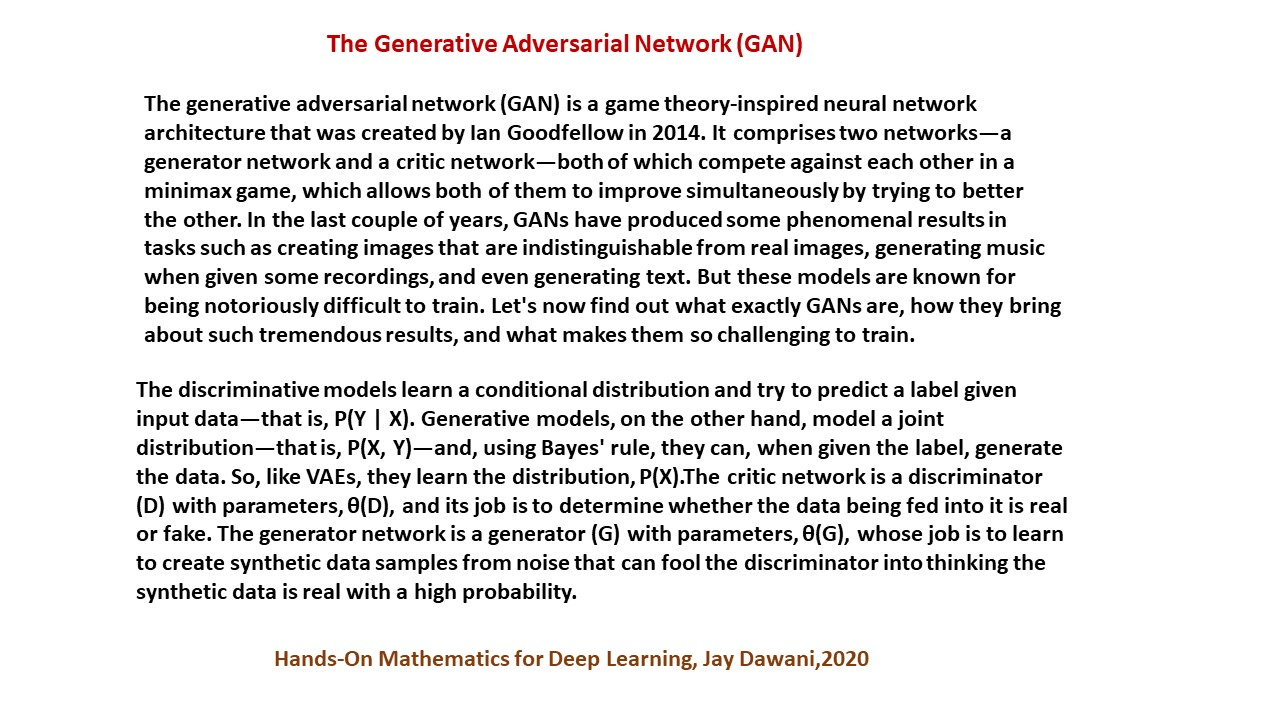

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/GAN-1.jpg', width=900,height=900)

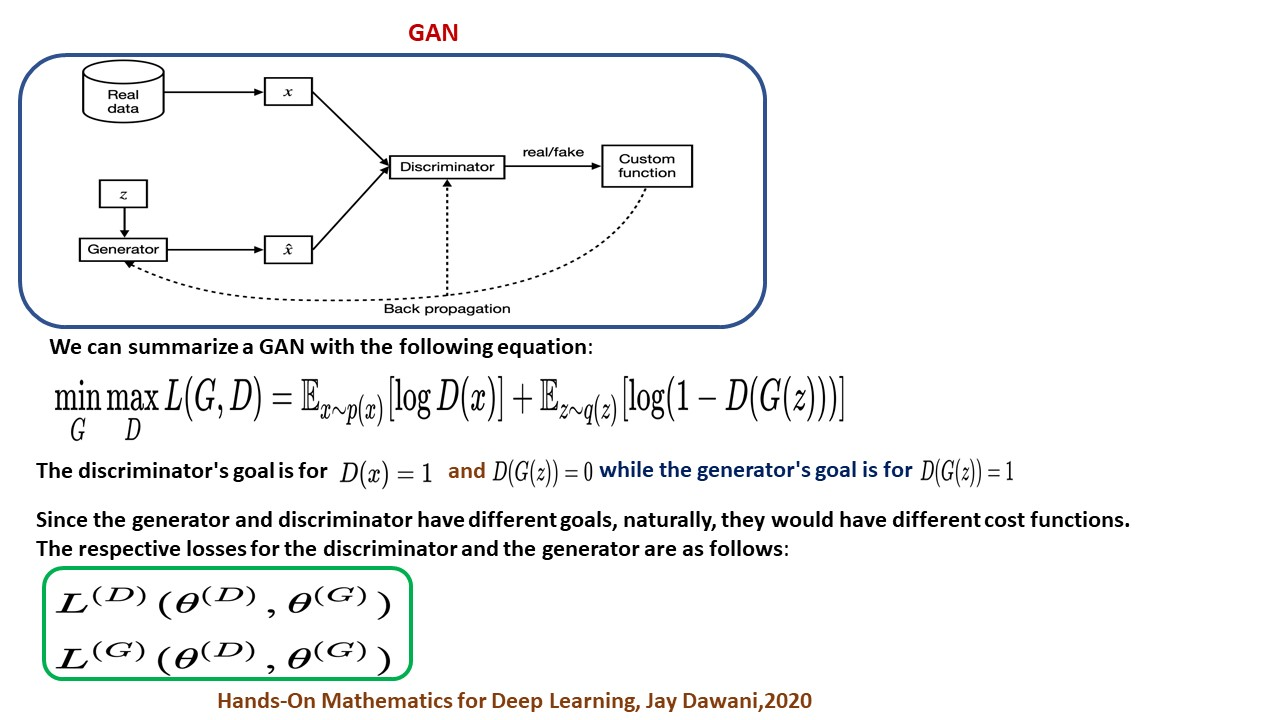

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/GAN-2.jpg', width=900,height=900)

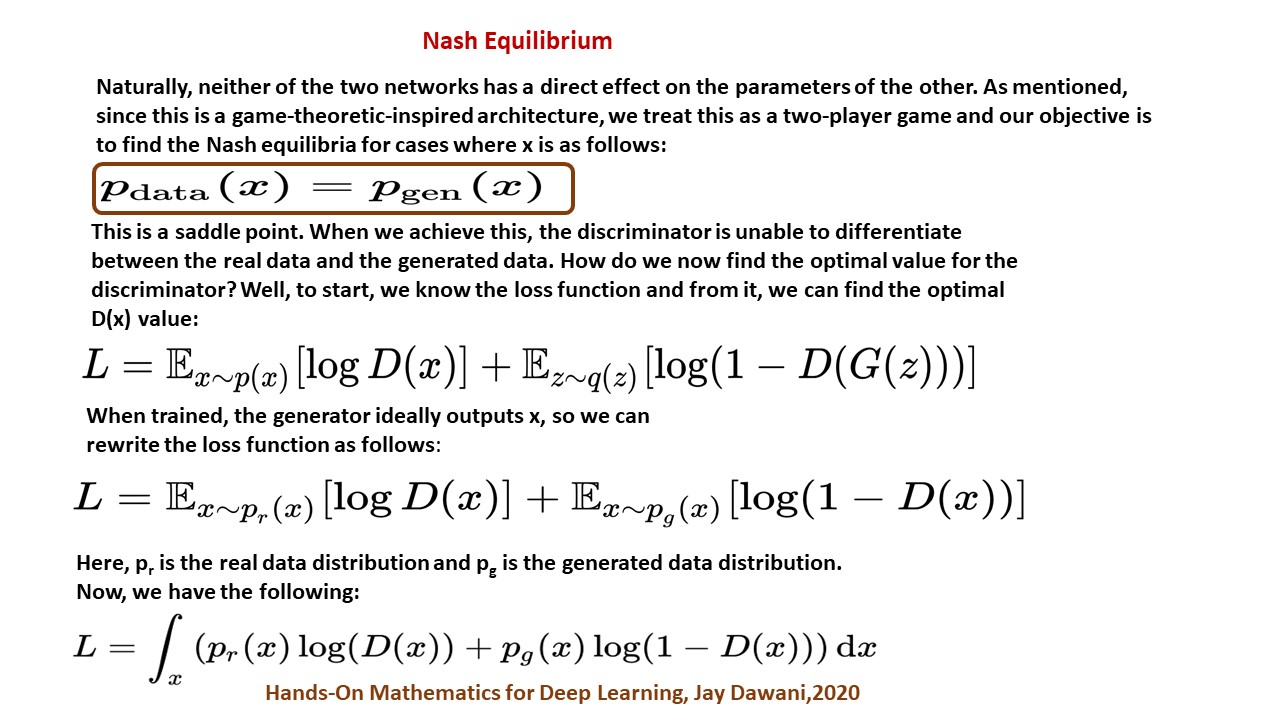

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/GAN-3.jpg', width=900,height=900)

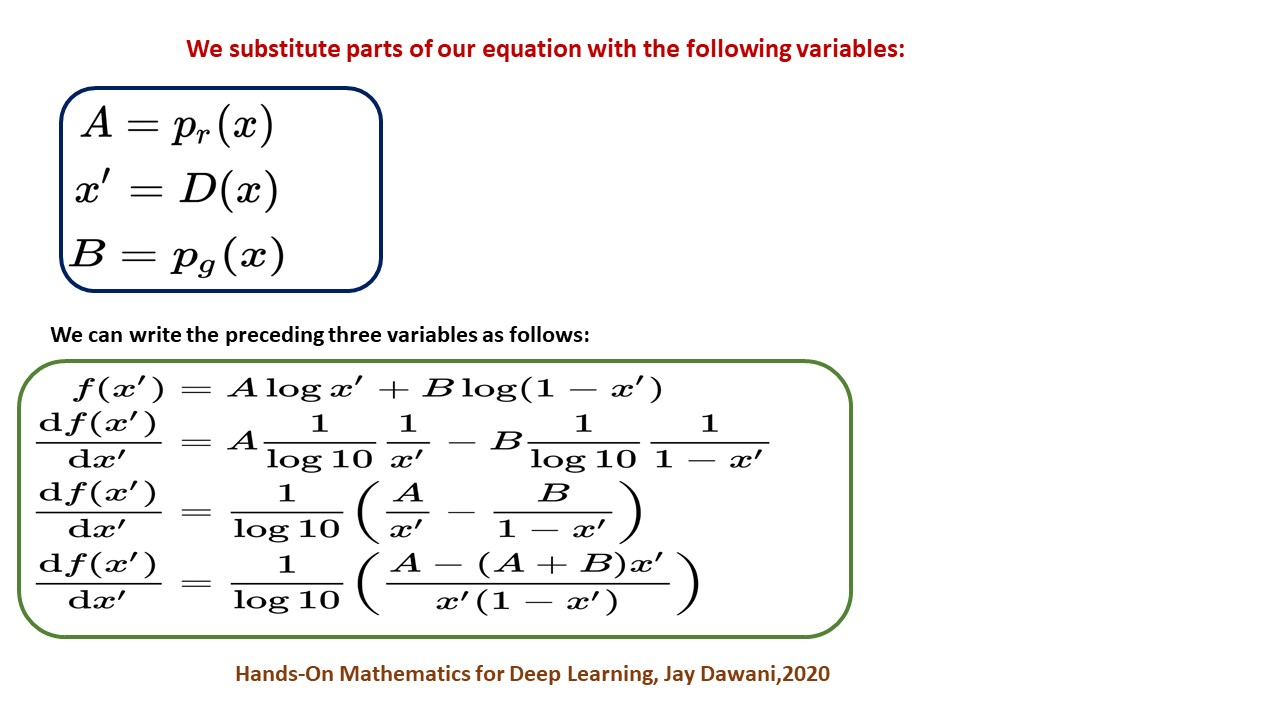

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/GAN-4.jpg', width=900,height=900)

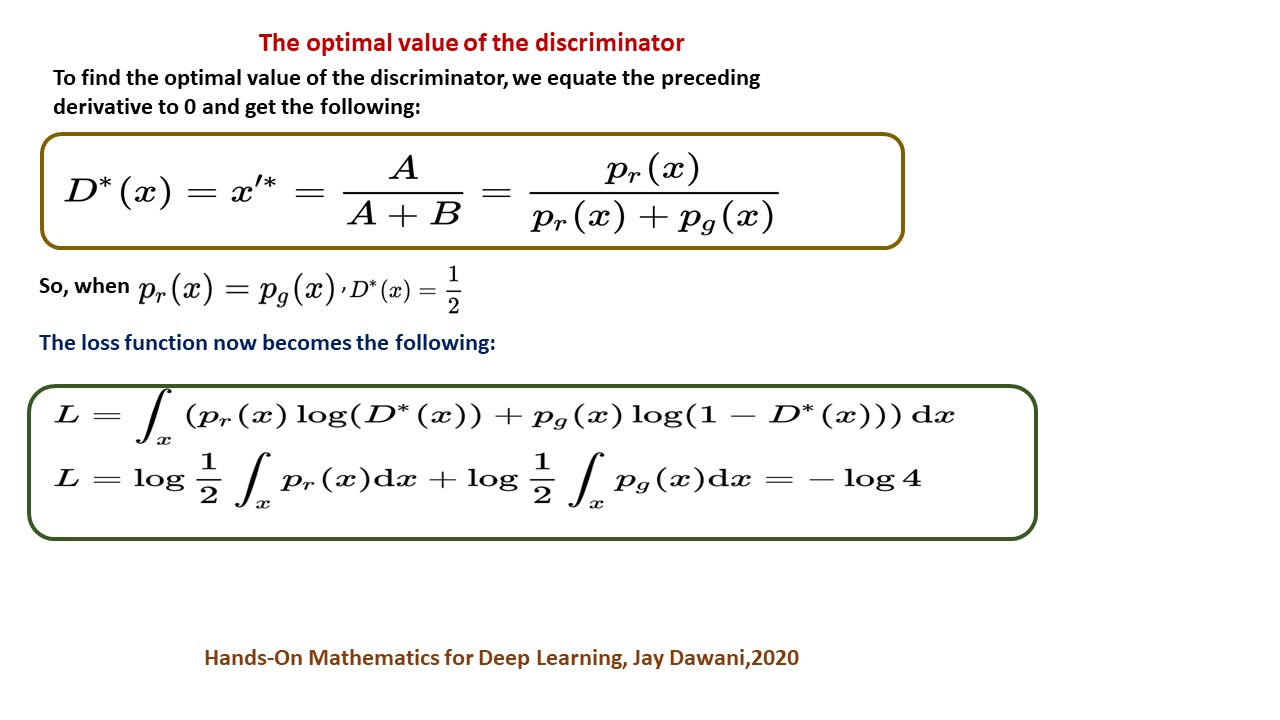

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/GAN-5.jpg', width=900,height=900)

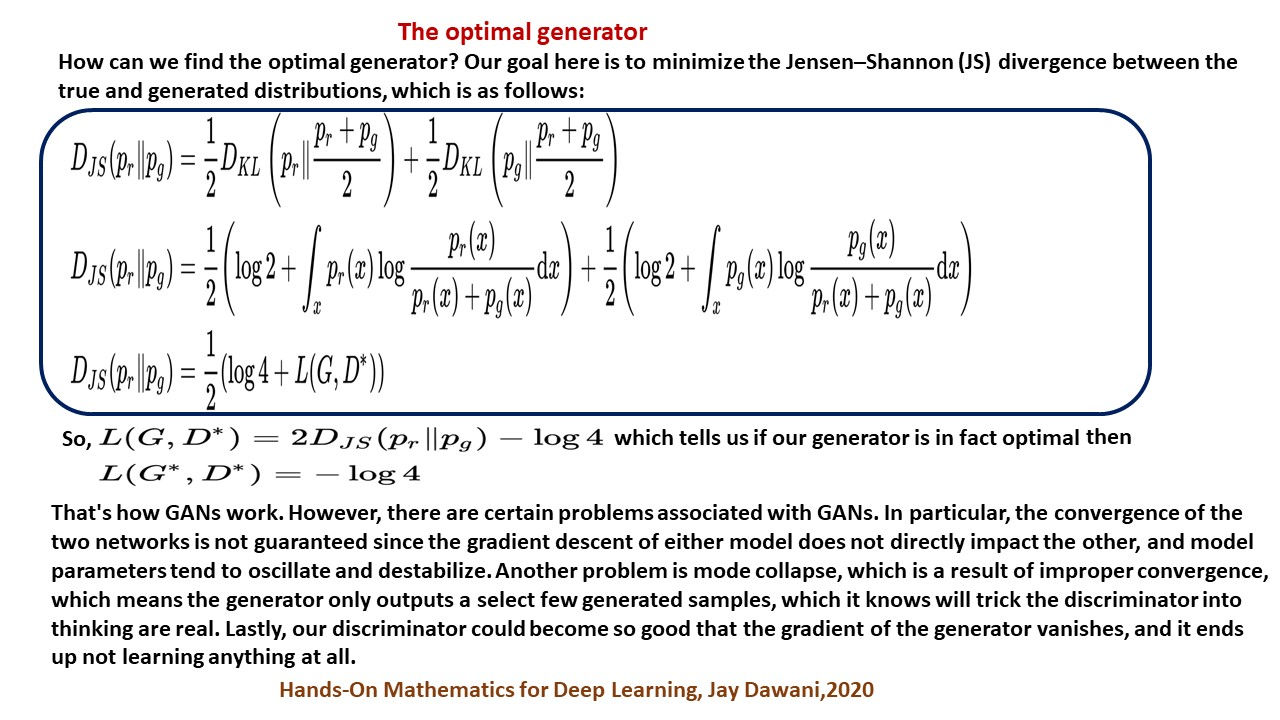

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/GAN-6.jpg', width=1000,height=1000)

#**A.Generative Adversarial Networks with TensorFlow**

#**1.Import libraries.**

In [ ]:
import numpy as np
import os


import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Conv2D, BatchNormalization, Dropout, Flatten
from keras.layers import Activation, Reshape, Conv2DTranspose, UpSampling2D # new! 
from tensorflow.keras.optimizers import RMSprop


import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


from zipfile import ZipFile
import os

with ZipFile('/content/drive/MyDrive/GAN-2022/apple.zip','r') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/GAN')

#**2. We load our data.**

In [ ]:
input_images = "/content/drive/MyDrive/GAN/apple.npy"

In [ ]:
data = np.load(input_images) # 

In [ ]:
data.shape

(144722, 784)

In [ ]:
data[3765]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  13,  60,  78,  92,  13,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  89, 231, 255, 255, 255,  76,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  30, 184, 255, 194,  68,  43,  22,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  12, 213, 238, 100,   1,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 250,  57,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   6,  78, 166, 207, 149,  47, 25

#**3.We scale and reshape our images.**

In [ ]:
data = data/255
data = np.reshape(data,(data.shape[0],28,28,1)) 
img_w,img_h = data.shape[1:3]
data.shape

(144722, 28, 28, 1)

In [ ]:
data[2765]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.03529412],
        [0.39607843],
        [0.01568627],
        [0.        ],
        

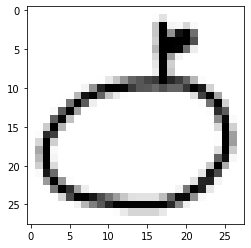

In [ ]:
plt.imshow(data[2654,:,:,0], cmap='Greys')

#**4.We create the discriminator network.**

In [ ]:
def discriminator_builder(depth=64,p=0.4):

    
    inputs = Input((img_w,img_h,1))
    
    
    conv1 = Conv2D(depth*1, 5, strides=2, padding='same', activation='relu')(inputs)
    conv1 = Dropout(p)(conv1)
    
    conv2 = Conv2D(depth*2, 5, strides=2, padding='same', activation='relu')(conv1)
    conv2 = Dropout(p)(conv2)
    
    conv3 = Conv2D(depth*4, 5, strides=2, padding='same', activation='relu')(conv2)
    conv3 = Dropout(p)(conv3)
    
    conv4 = Conv2D(depth*8, 5, strides=1, padding='same', activation='relu')(conv3)
    conv4 = Flatten()(Dropout(p)(conv4))
    
    
    output = Dense(1, activation='sigmoid')(conv4)
    
    
    model = Model(inputs=inputs, outputs=output)
    model.summary()
    
    return model

In [ ]:
discriminator = discriminator_builder()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        1664      
                                                                 
 dropout_10 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 128)         204928    
                                                                 
 dropout_11 (Dropout)        (None, 7, 7, 128)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 4, 4, 256)         819456    
                                                                 
 dropout_12 (Dropout)        (None, 4, 4, 256)         0   

#**5. We compile the model.**

In [ ]:
discriminator.compile(loss='binary_crossentropy', 
                      optimizer=RMSprop(lr=0.0008, decay=6e-8, clipvalue=1.0), 
                      metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


#**6. We create the generator network.**

In [ ]:
def generator_builder(z_dim=100,depth=64,p=0.4):
    
    
    inputs = Input((z_dim,))
    
    
    dense1 = Dense(7*7*64)(inputs)
    dense1 = BatchNormalization(momentum=0.9)(dense1) # default momentum for moving average is 0.99
    dense1 = Activation(activation='relu')(dense1)
    dense1 = Reshape((7,7,64))(dense1)
    dense1 = Dropout(p)(dense1)
    
    
    conv1 = UpSampling2D()(dense1)
    conv1 = Conv2DTranspose(int(depth/2), kernel_size=5, padding='same', activation=None,)(conv1)
    conv1 = BatchNormalization(momentum=0.9)(conv1)
    conv1 = Activation(activation='relu')(conv1)
    
    conv2 = UpSampling2D()(conv1)
    conv2 = Conv2DTranspose(int(depth/4), kernel_size=5, padding='same', activation=None,)(conv2)
    conv2 = BatchNormalization(momentum=0.9)(conv2)
    conv2 = Activation(activation='relu')(conv2)
    
    conv3 = Conv2DTranspose(int(depth/8), kernel_size=5, padding='same', activation=None,)(conv2)
    conv3 = BatchNormalization(momentum=0.9)(conv3)
    conv3 = Activation(activation='relu')(conv3)

    
    output = Conv2D(1, kernel_size=5, padding='same', activation='sigmoid')(conv3)

       
    model = Model(inputs=inputs, outputs=output)
    model.summary()
    
    return model

In [ ]:
generator = generator_builder()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_9 (Dense)             (None, 3136)              316736    
                                                                 
 batch_normalization_8 (Batc  (None, 3136)             12544     
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 3136)              0         
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 dropout_14 (Dropout)        (None, 7, 7, 64)          0         
                                                           

#**7. We create the adversarial network.**


In [ ]:
def adversarial_builder(z_dim=100):
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', 
                  optimizer=RMSprop(lr=0.0004, decay=3e-8, clipvalue=1.0), 
                  metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
adversarial_model = adversarial_builder()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_5 (Functional)        (None, 28, 28, 1)         396961    
                                                                 
 model_4 (Functional)        (None, 1)                 4311553   
                                                                 
Total params: 4,708,514
Trainable params: 4,702,130
Non-trainable params: 6,384
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


#**8.We train our model.**

In [ ]:
def make_trainable(net, val):
    net.trainable = val
    for l in net.layers:
        l.trainable = val

In [ ]:
def train(epochs=2000,batch=128):
    
    d_metrics = []
    a_metrics = []
    
    running_d_loss = 0
    running_d_acc = 0
    running_a_loss = 0
    running_a_acc = 0
    
    for i in range(epochs):
        
        if i%100 == 0:
            print(i)
        
        real_imgs = np.reshape(data[np.random.choice(data.shape[0],batch,replace=False)],(batch,28,28,1))
        fake_imgs = generator.predict(np.random.uniform(-1.0, 1.0, size=[batch, 100]))

        x = np.concatenate((real_imgs,fake_imgs))
        y = np.ones([2*batch,1])
        y[batch:,:] = 0
        
        make_trainable(discriminator, True)
        
        d_metrics.append(discriminator.train_on_batch(x,y))
        running_d_loss += d_metrics[-1][0]
        running_d_acc += d_metrics[-1][1]
        
        make_trainable(discriminator, False)
        
        noise = np.random.uniform(-1.0, 1.0, size=[batch, 100])
        y = np.ones([batch,1])

        a_metrics.append(adversarial_model.train_on_batch(noise,y)) 
        running_a_loss += a_metrics[-1][0]
        running_a_acc += a_metrics[-1][1]
        
        if (i+1)%500 == 0:

            print('Epoch #{}'.format(i+1))
            log_mesg = "%d: [D loss: %f, acc: %f]" % (i, running_d_loss/i, running_d_acc/i)
            log_mesg = "%s  [A loss: %f, acc: %f]" % (log_mesg, running_a_loss/i, running_a_acc/i)
            print(log_mesg)

            noise = np.random.uniform(-1.0, 1.0, size=[16, 100])
            gen_imgs = generator.predict(noise)

            plt.figure(figsize=(5,5))

            for k in range(gen_imgs.shape[0]):
                plt.subplot(4, 4, k+1)
                plt.imshow(gen_imgs[k, :, :, 0], cmap='gray')
                plt.axis('off')
                
            plt.tight_layout()
            plt.show()
    
    return a_metrics, d_metrics

#**9. After 100 epochs of training, we have some elementary structures that the generator had learned. After 200 epochs of training, those structures are starting to look a little bit like sketches, and even more so after 300 epochs. And then, after about 1,000 epochs of training, we will have quite a few of these sketches starting to look roughly like apples. Moreover, after 2,000 epochs, many examples are high-quality unreal sketches of apples. Here, we have used 1000 epochs.**

0
100
200
300
400
Epoch #500
499: [D loss: 0.464435, acc: 0.820907]  [A loss: 2.031938, acc: 0.167695]


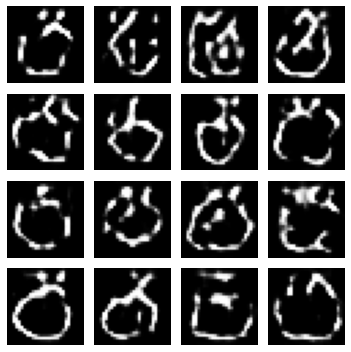

500
600
700
800
900
Epoch #1000
999: [D loss: 0.538404, acc: 0.749159]  [A loss: 1.685164, acc: 0.145450]


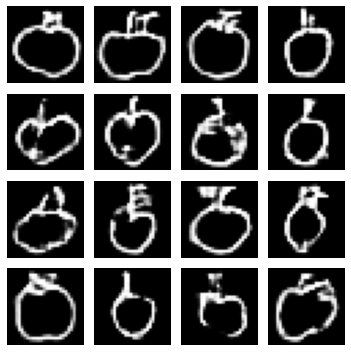

In [ ]:
a_metrics_complete, d_metrics_complete = train(epochs=1000)

#**10.We plot the training loss for the Generator and Discriminator.**

Text(0, 0.5, 'Loss')

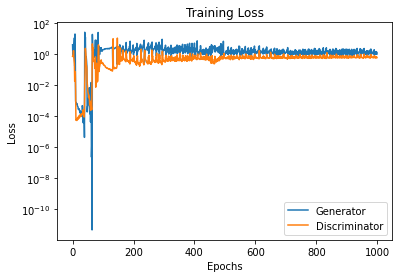

In [ ]:
ax = pd.DataFrame(
    {
        'Generator': [metric[0] for metric in a_metrics_complete],
        'Discriminator': [metric[0] for metric in d_metrics_complete],
    }
).plot(title='Training Loss', logy=True)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")

#**11.We plot the training accuracy for the Generator and Discriminator.**

Text(0, 0.5, 'Accuracy')

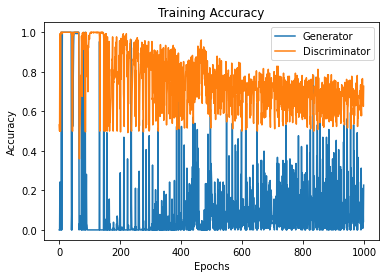

In [ ]:
ax = pd.DataFrame(
    {
        'Generator': [metric[1] for metric in a_metrics_complete],
        'Discriminator': [metric[1] for metric in d_metrics_complete],
    }
).plot(title='Training Accuracy')
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")

#**B.Generative Adversarial Networks with Pytorch**

#**1.Import libraries.**

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd.variable import Variable
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
from IPython.display import clear_output

#**2. We define our Imshow helper function.**

In [ ]:
def imshow(img,size=10):
  img = img / 2 + 0.5     
  npimg = img.numpy()
  plt.figure(figsize=(size, size))
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

#**3. We load our data.**

In [ ]:
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,),(0.5,))
                ])
to_image = transforms.ToPILImage()
trainset = MNIST(root='./data/', train=True, download=True, transform=transform)
train_loader = DataLoader(trainset, batch_size=100, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



device(type='cuda')

#**4.We create the Generator Class and Discriminator Class.**

In [ ]:
class Generator(nn.Module):
  def __init__(self, latent_dim=128, output_dim=784):
    super(Generator, self).__init__()
    self.latent_dim = latent_dim
    self.output_dim = output_dim
    self.generator = nn.Sequential(
        nn.Linear(self.latent_dim, 256),
        nn.LeakyReLU(0.2),
        nn.Linear(256, 512),
        nn.LeakyReLU(0.2),
        nn.Linear(512, 1024),
        nn.LeakyReLU(0.2),
        nn.Linear(1024, self.output_dim),
        nn.Tanh()
    )

  def forward(self, x):
    x = self.generator(x)
    x = x.view(-1, 1, 28, 28)
    return x

class Discriminator(nn.Module):
  def __init__(self, input_dim=784, output_dim=1):
    super(Discriminator, self).__init__()
    self.input_dim = input_dim
    self.output_dim = output_dim
    self.discriminator = nn.Sequential(
      nn.Linear(self.input_dim, 1024),
      nn.LeakyReLU(0.2),
      nn.Dropout(0.3),
      nn.Linear(1024, 512),
      nn.LeakyReLU(0.2),
      nn.Dropout(0.3),
      nn.Linear(512, 256),
      nn.LeakyReLU(0.2),
      nn.Dropout(0.3),
      nn.Linear(256, self.output_dim),
      nn.Sigmoid()
    )

  def forward(self, x):
        x = x.view(-1, 784)
        x = self.discriminator(x)
        return x

#**5. We create the optimizer and loss function.We also need to create some helper functions. The first function noise generates the random noise we input into the generator. The second function, make_ones is a helper to mark the batch as real, with 1s. Then the third function, make_zeros, does the opposite and marks the batch of images with a zero for unauthentic images.**


In [ ]:
generator = Generator()
discriminator = Discriminator()

generator.to(device)
discriminator.to(device)

g_optim = optim.Adam(generator.parameters(), lr=2e-4)
d_optim = optim.Adam(discriminator.parameters(), lr=2e-4)

g_losses = []
d_losses = []

loss_fn = nn.BCELoss()

def noise(n, n_features=128):
    return Variable(torch.randn(n, n_features)).to(device)

def make_ones(size):
    data = Variable(torch.ones(size, 1))
    return data.to(device)

def make_zeros(size):
    data = Variable(torch.zeros(size, 1))
    return data.to(device)

#**6.We come to the training code, which is slightly different than we have seen before. Since we constructed two helper functions to independently train the generator and discriminator. This code loops through and calls those functions. Notice the addition of an internal training loop restricted by k. This internal loop can be used to increase the number of iterations we train the discriminator on each epoch. We need to do this to better balance the training. It is best to keep both models in a GAN learning at the same rate. Here, I have put epochs=2. However, to obtain better results, you need to increase the number of epochs**

In [ ]:
def train_discriminator(optimizer, real_data, fake_data):
    n = real_data.size(0)
    optimizer.zero_grad()
    
    prediction_real = discriminator(real_data)
    loss_real = loss_fn(prediction_real, make_ones(n))
    loss_real.backward()

    prediction_fake = discriminator(fake_data)
    loss_fake = loss_fn(prediction_fake, make_zeros(n))
    
    loss_fake.backward()
    optimizer.step()
    
    return loss_real + loss_fake

def train_generator(optimizer, fake_data):
    n = fake_data.size(0)
    optimizer.zero_grad()
    
    prediction = discriminator(fake_data)
    loss = loss_fn(prediction, make_ones(n))
    
    loss.backward()
    optimizer.step()
    
    return loss

Epoch 2: g_loss: 5.70312214 d_loss: 0.58481121


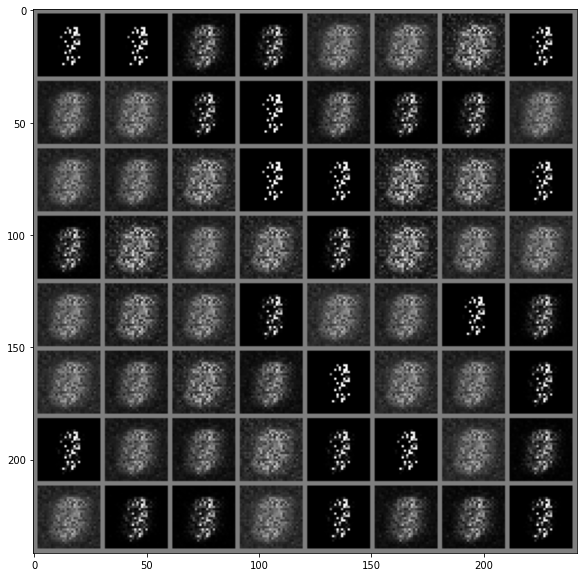

In [ ]:
epochs = 2
k = 1
test_noise = noise(64)

generator.train()
discriminator.train()
for epoch in range(epochs):
    g_loss = 0.0
    d_loss = 0.0
    for i, data in enumerate(train_loader):
        imgs, _ = data
        n = len(imgs)
        for j in range(k):
            fake_data = generator(noise(n)).detach()
            real_data = imgs.to(device)
            d_loss += train_discriminator(d_optim, real_data, fake_data)
        fake_data = generator(noise(n))
        g_loss += train_generator(g_optim, fake_data)

    img = generator(test_noise).cpu().detach()        
    g_losses.append(g_loss/i)
    d_losses.append(d_loss/i)
    clear_output()
    print(f'Epoch {epoch+1}: g_loss: {g_loss/i:.8f} d_loss: {d_loss/i:.8f}')
    imshow(make_grid(img))   

#**References:**
#**[1] Advanced Forecasting with Python: With State-of-the-Art-Models Including LSTMs, Facebook’s Prophet, and Amazon’s DeepAR, Joos Korstanje, July 2021.**
#**[2]. Deep Learning: Recurrent Neural Networks with Python, AI Sciences, 2021.**
#**[3]. Deep Learning with Applications Using Python : Chatbots and Face, Object, and Speech Recognition With TensorFlow and Keras, Navin Kumar Manaswi, 2018.**
#**[4]. Machine Vision, GANs, and Deep Reinforcement Learning, Jon Krohn, 2020.**
#**[5]. Generating a New Reality: From Autoencoders and Adversarial Networks to Deepfakes, Micheal Lanham, 2021.**
#**[6].Hands-On Mathematics for Deep Learning, Jay Dawani, 2020**
